In [1]:
import pandas as pd
import zipfile

In [2]:
!ls

data  exploracion.ipynb  readme.txt


In [ ]:
zipfile

In [3]:
!ls data/

Archivo.zip  contratacionesabiertas_bulk.json.zip  datos.zip


In [3]:
!ls

data  exploracion.ipynb  readme.txt


In [4]:
zf = zipfile.ZipFile('data/contratacionesabiertas_bulk.json.zip') 


In [6]:
zf.filelist

[<ZipInfo filename='20181127/contratacionesabiertas_bulk.json' compress_type=deflate filemode='-rw-rw-r--' file_size=5105787571 compress_size=504347313>]

In [8]:
contrataciones_abiertas = pd.read_json( zf.open("20181127/contratacionesabiertas_bulk.json"))

In [9]:
!ls data

'04_proveedores_contratistas_sancionados '
'06_registro_proveedores_contratistas '
 08_servidores_publicos_sancionados
 17_servidores_publicos_contrataciones
 Archivo.zip
 contratacionesabiertas_bulk.json.zip


In [23]:
contrataciones_abiertas["records"].head()

0    [{'ocid': 'ocds-07smqs-1038', 'releases': [{'p...
1    [{'ocid': 'ocds-07smqs-1072', 'releases': [{'p...
2    [{'ocid': 'ocds-07smqs-1111', 'releases': [{'p...
3    [{'ocid': 'ocds-07smqs-1117', 'releases': [{'p...
4    [{'ocid': 'ocds-07smqs-1182', 'releases': [{'p...
Name: records, dtype: object

In [36]:
contrataciones_abiertas["records"][0][0]["releases"][0]["parties"]

[{'name': 'delegación SEDESOL en Tabasco',
  'id': '20147',
  'identifier': {'scheme': 'MX-CPA',
   'id': '20147',
   'legalName': 'delegación SEDESOL en Tabasco',
   'schemeUrl': 'http://www.transparenciapresupuestaria.gob.mx/work/models/PTP/DatosAbiertos/Metadatos/catalogos_presupuestarios.xlsx'},
  'additionalIdentifiers': [{'scheme': 'MX-CPA',
    'id': '20',
    'legalName': 'Desarrollo Social',
    'schemeUrl': 'http://www.transparenciapresupuestaria.gob.mx/work/models/PTP/DatosAbiertos/Metadatos/catalogos_presupuestarios.xlsx'}],
  'contactPoint': {'name': 'Gustavo Antonio Glori Tellechea'},
  'roles': ['buyer']},
 {'name': 'JESUS ALBERTO ROSAS GARDUZA',
  'id': '95F5D7F5DD77D73E3232026B4732232A',
  'identifier': {'scheme': 'MX-RFC',
   'id': '95F5D7F5DD77D73E3232026B4732232A',
   'legalName': 'JESUS ALBERTO ROSAS GARDUZA',
   'schemeUrl': 'https://portalsat.plataforma.sat.gob.mx/ConsultaRFC/'},
  'contactPoint': {'name': 'JESUS A ROSAS GARDUZA'},
  'roles': ['supplier']}]

In [51]:
contrataciones_abiertas["records"][0][0]["ocid"]

'ocds-07smqs-1038'

In [65]:
contrataciones_abiertas.loc[0]["records"]

_id                               {'$oid': '5bfc962b940a526b336ff15f'}
extensions           [https://raw.githubusercontent.com/open-contra...
license                                https://datos.gob.mx/libreusomx
publicationPolicy    https://compranetinfo.funcionpublica.gob.mx/de...
publishedDate                              2018-11-27T00:56:09.150984Z
publisher            {'name': 'SECRETARÍA DE LA FUNCIÓN PÚBLICA / S...
records              [{'ocid': 'ocds-07smqs-1038', 'releases': [{'p...
uri                  https://api.datos.gob.mx/v2/contratacionesabie...
version                                                            1.1
Name: 0, dtype: object

In [101]:
import networkx as nx
G=nx.DiGraph()
for i,record in contrataciones_abiertas.iterrows():
    G.add_node(record["records"][0]["ocid"], type_entity='contrato')
    for party in record["records"][0]["releases"][0]["parties"]:
        if "supplier" in party["roles"]:G.add_node(party["id"], type_entity='empresa')
        if "buyer" in party["roles"]: G.add_node(party["id"], type_entity='institucion')
        G.add_edge(record["records"][0]["ocid"], party["id"])

['ocds-07smqs-1038',
 '20147',
 '95F5D7F5DD77D73E3232026B4732232A',
 'ocds-07smqs-1072',
 'SDS060209QG3',
 'ocds-07smqs-1111',
 '20135',
 'SDS040719E51',
 'ocds-07smqs-1117',
 '48D00']

In [88]:
%matplotlib inline

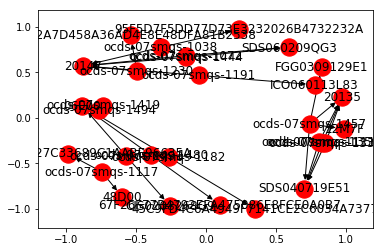

In [108]:
nx.draw_networkx(G.subgraph(list(G.nodes())[0:30]), fig_size = [20,20])

In [14]:
!ls "data/04_proveedores_contratistas_sancionados /proveedores_sancionados.csv"

diccionario  proveedores_sancionados.csv


In [21]:
contcontratistas_sancionados = pd.read_csv("data/04_proveedores_contratistas_sancionados /proveedores_sancionados.csv", error_bad_lines=False, encoding="latin-1")

b'Skipping line 1038: expected 12 fields, saw 13\n'


In [48]:
contratistas_sancionados.head(5)

,PROVEEDOR O CONTRATISTA,DEPENDENCIA,NUMERO DE EXPEDIENTE,HECHOS DE LA IRREGULARIDAD,OBJETO SOCIAL,SENTIDO DE RESOLUCION,FECHA DE NOTIFICACION,FECHA DE RESOLUCION,PLAZO,MONTO,NOMBRE DEL RESPONSABLE DE LA INFORMACION,FECHA DE ACTUALIZACION
0,3R INNOVACIÓN Y DISEÑO S.A. DE C.V.,\tINSTITUTO MEXICANO DEL SEGURO SOCIAL,\t0041/2013,\tLA EMPRESA POR CAUSAS IMPUTABLES A ELLA NO F...,\t3RINNOVACION@LIVE.COM.MX.,\tSANCIONATORIA CON MULTA,\t19/08/2014,\t06/08/2014,\t,\t90664.00,\tLIC. JORGE PERALTA PORRAS,\t06/12/2018 08:12
1,A AND P INTERNATIONAL,\tPEMEX GAS Y PETROQUIMICA BASICA,\t0002/2016,\tLO PREVISTO EN EL NUMERAL 59 FRACCIÓN III ...,\t,\tSANCIONATORIA CON MULTA E INHABILITACIÓN,\t06/12/2016,\t06/12/2016,\t4 AÑOS,\t1.00,\t,\t06/12/2018 08:12
2,A Y M CONSTRUCTORA S.A. DE C.V.,\tSECRETARIA DE COMUNICACIONES Y TRANSPORTES,\t0121/2006,\tPRESENTÓ INFORMACIÓN FALSA RESPECTO A ENCONT...,\t,\tSANCIONATORIA CON MULTA E INHABILITACIÓN,\t05/04/2007,\t23/03/2007,\t3 MESES,\t72540.00,\tHECTOR MANUEL MONTES GAYTAN,\t06/12/2018 08:12
3,A Y V INDUSTRIAL Y COMERCIAL S.A. DE C.V.,\tIII SERVICIOS S. A. DE C. V.,\t0001/2013,\tPRESENTACION DE DOCUMENTACION E INFORMACION ...,\tDISEÑAR PROYECTAR PLANEAR ORGANIZAR ASES...,\tSANCIONATORIA CON MULTA E INHABILITACIÓN,\t08/05/2014,\t30/04/2014,\t3 MESES,\t133502.74,\tEDUARDO DE LA LUZ GARCÍA,\t06/12/2018 08:12
4,A&S CONSTRUCTION GROUP S.A. DE C.V.,\tADMINISTRACION PORTUARIA INTEGRAL DE DOS BOC...,\t0002/2017,\tPRESENTÓ INFORMACIÓN FALSA RESPECTO A ENCONT...,\tREALIZACIÓN DE FLETES Y ACARREOS LOCALES Y ...,\tSANCIONATORIA CON MULTA E INHABILITACIÓN,\t24/10/2018,\t15/10/2018,\t3 MESES,\t113235.00,\tJOSÉ GUADALUPE FÉLIX DE LA CRUZ,\t06/12/2018 08:12


In [38]:
!ls data

'04_proveedores_contratistas_sancionados '
'06_registro_proveedores_contratistas '
 08_servidores_publicos_sancionados
 17_servidores_publicos_contrataciones
 Archivo.zip
 contratacionesabiertas_bulk.json.zip


In [41]:
!ls data/17_servidores_publicos_contrataciones

diccionario  diccionario_reniresp.xlsx


In [47]:
servidores_sancionados = pd.read_excel("data/17_servidores_publicos_contrataciones/diccionario_reniresp.xlsx", error_bad_lines=False, encoding="latin-1")

In [49]:
import networkx